In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]='1'

In [3]:
(X_train,_),(X_test, _)=mnist.load_data()
X_train= X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float)/255
X_test= X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float)/255

In [7]:
autoencoder = models.Sequential()
autoencoder.add(layers.Conv2D(16,kernel_size=3,padding='same',
                             input_shape=(28,28,1),activation='relu'))
autoencoder.add(layers.MaxPool2D(pool_size=2,padding='same'))
autoencoder.add(layers.Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(layers.MaxPool2D(pool_size=2,padding='same'))
autoencoder.add(layers.Conv2D(8,kernel_size=3,padding='same',activation='relu',
                             strides=2))

autoencoder.add(layers.Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16,kernel_size=3,activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1,kernel_size=3,padding='same',activation='sigmoid'))

autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)          

In [9]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train,X_train, epochs=50, batch_size=128,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 90s 191ms/step - loss: 0.2074 - val_loss: 0.1434
Epoch 2/50
469/469 [==============================] - 84s 178ms/step - loss: 0.1301 - val_loss: 0.1206
Epoch 3/50
469/469 [==============================] - 83s 177ms/step - loss: 0.1174 - val_loss: 0.1123
Epoch 4/50
469/469 [==============================] - 83s 176ms/step - loss: 0.1109 - val_loss: 0.1070
Epoch 5/50
469/469 [==============================] - 84s 179ms/step - loss: 0.1064 - val_loss: 0.1036
Epoch 6/50
469/469 [==============================] - 84s 179ms/step - loss: 0.1029 - val_loss: 0.1005
Epoch 7/50
469/469 [==============================] - 84s 178ms/step - loss: 0.1001 - val_loss: 0.0976
Epoch 8/50
469/469 [==============================] - 83s 178ms/step - loss: 0.0978 - val_loss: 0.0956
Epoch 9/50
469/469 [==============================] - 85s 181ms/step - loss: 0.0960 - val_loss: 0.0939
Epoch 10/50
469/469 [==============================] - 83s 178ms/step - l

313/313 [==============================] - 1s 3ms/step


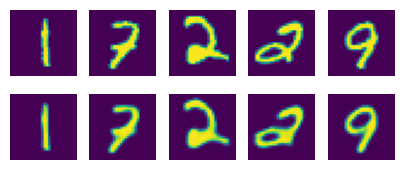

In [10]:
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()